# ParFlow Short Course: Initial Conditions, Boundary Conditions, and Subsurface Properties
## Exercise: Initial Conditions and Boundary Conditions

### Domain Description
We will be working with a simple 2D box cross section domain with the following characteristics:
 - A simple cross section box domain
 - The domain is consists of a single row of 20 cells (each of which are 100 m long and 2 m wide) with 10 vertical layers of varying thickness that extend to a thickness of 48m
 - The domain slopes from right to left with a constant slope of 0.1
 - The subsurface is homogeneous
 - Simulations run for 100 hours with a time step of 1 hour.
 - There are no-flow boundary conditions on all sides except the upper x boundary (i.e. the right boundary) which has a Direchlet (constant head) boundary condition set to 1m below the surface and the top surface which has an overland flow boundary condition 
 - A constant recharge flux of 0.01m/h is applied across the top of the domain 
 - The initial head for the entire domain is set to 10m below the land surface

### Topics Covered
1. Land Surface Boundary Conditions
2. Subsurface Boundary Conditions
3. Initial Conditions

## Topic 1: Land Surface Boundary Conditions

We will first explore how different land surface boundary conditions affect the results of a ParFlow run. The following notebook cells set up a ParFlow run by importing a ParFlow run definition, run ParFlow for 100 timesteps, and visualize the resulting ParFlow run grid. Please see [box_domain_setup_full.ipynb](https://github.com/hydroframe/parflow_short_course_updated/blob/main/initial_conditions/box_domain_setup_full.ipynb) if you would like to see the full set of keys used to define the domain for this ParFlow run. In this section we are focusing on the ParFlow keys related to [Boundary Conditions: Pressure](https://parflow.readthedocs.io/en/latest/keys.html#boundary-conditions-pressure) and [Boundary Conditions: Saturation](https://parflow.readthedocs.io/en/latest/keys.html#boundary-conditions-saturation). We will explain these keys in more detail in the cells below. Also feel free to explore the [ParFlow manual](https://parflow.readthedocs.io/en/latest/keys.html#) for detail on all ParFlow keys.

Here you will start with the water table at a constant depth below the surface. We'd like for you to first run the notebook cells in this section as-is to see the default domain visualized. Then we will provide instructions on how to experiment with changing several of the ParFlow keys to see how the results change.

We will show how to accomplish each of the following:
1. Update the key `domain_example.Patch.z_upper.BCPressure.alltime.Value` to -0.02 to double the surface recharge flux. Re-run the plots and compare how the output changes.
1. Update the key `domain_example.Patch.z_upper.BCPressure.alltime.Value` to 0.00 to apply a constant pressure of zero across the top (like a lake). Re-run the plots and compare how the output changes.

In [1]:
# Import the ParFlow package
from parflow import Run
import os
import sys
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists

# Import functions for plotting
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../plots")))
from plots import plot_domain, plot_subsurface_storage, plot_water_balance

In [2]:
# Import run information from pfidb
domain_example = Run.from_definition("domain_example.pfidb")

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
domain_example.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
domain_example.Patch.z_upper.BCPressure.Cycle         = 'constant'
domain_example.Patch.z_upper.BCPressure.alltime.Value = -0.01

#-----------------------------------------------------------------------------
# Run ParFlow
#-----------------------------------------------------------------------------
base = os.path.join(os.getcwd(), "output")
mkdir(base)
print(f"base: {base}")
domain_example.run(working_directory=base)

base: /home/jovyan/parflow_short_course_updated/initial_conditions/output

# ==============================================================================
# ParFlow directory
#  - /opt/parflow/
# ParFlow version
#  - 3.12.0
# Working directory
#  - /home/jovyan/parflow_short_course_updated/initial_conditions/output
# ParFlow database
#  - domain_example.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



Now let's take a look at the ParFlow grid. We will visualize how saturation and pressure vary within the defined grid. No need to change any of the code below, just run these cells after the ParFlow run in the previous cell completes and take a look at the output plots.

nx = 20, ny = 1, nz = 10, nt = 101
dx = 100.0, dy = 2.0, dz = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vmin: 0.28374782761443423, vmax: 0.9155417527999328


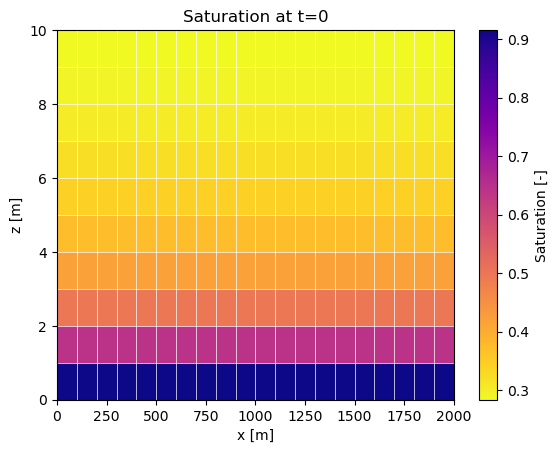

nx = 20, ny = 1, nz = 10, nt = 101
dx = 100.0, dy = 2.0, dz = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vmin: -9.5, vmax: -0.5


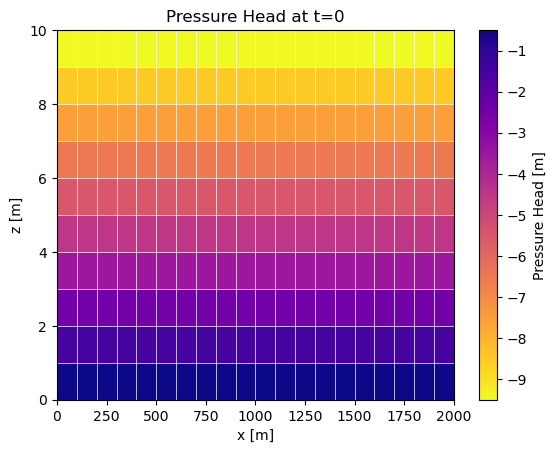

In [3]:
# Call plotting function for saturation and pressure
plot_domain(base, "satur", timestep=0)
plot_domain(base, "press", timestep=0)

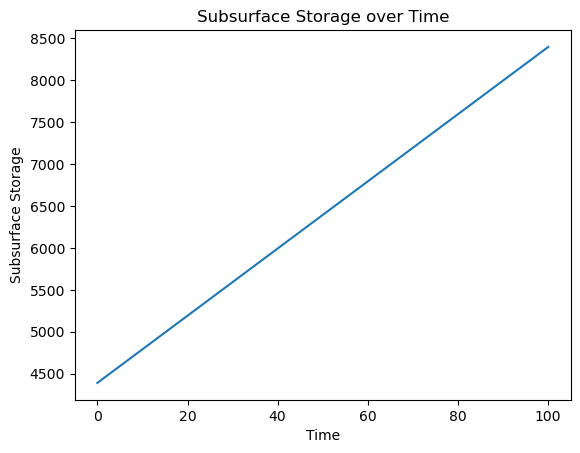

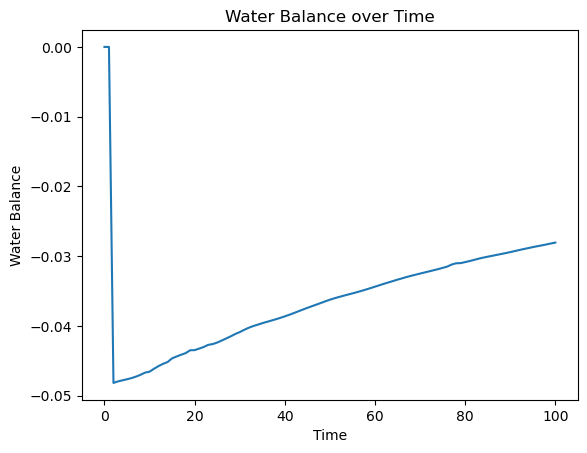

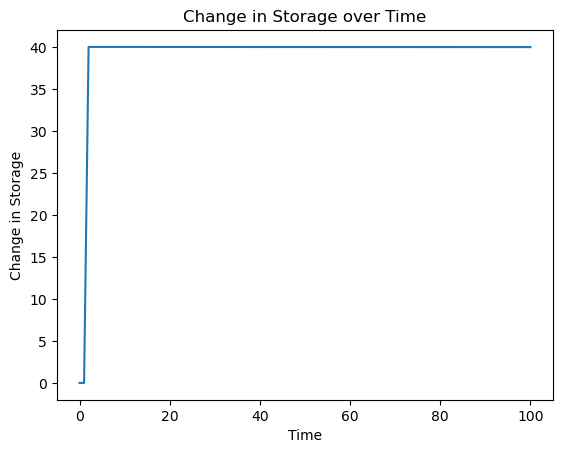

In [4]:
# Plot subsurface storage over time and water balance
plot_subsurface_storage(base)
plot_water_balance(base, run_name="domain_example")

## Topic 2: Subsurface Boundary Conditions

### Activities
You will explore how different subsurface boundary conditions affect the conditions of a ParFlow run. The following notebook cells set up a ParFlow run by importing a ParFlow run definition, run ParFlow for 100 timesteps, and visualize the resulting ParFlow run grid. Please see [box_domain_setup_full.ipynb](https://github.com/hydroframe/parflow_short_course_updated/blob/main/initial_conditions/box_domain_setup_full.ipynb) if you would like to see the full set of keys used to define the domain for this ParFlow run. In this section we are focusing on the ParFlow keys related to [Internal Boundary Conditions](https://parflow.readthedocs.io/en/latest/keys.html#internal-boundary-conditions). We will explain these keys in more detail in the cells below. Also feel free to explore the [ParFlow manual](https://parflow.readthedocs.io/en/latest/keys.html#) for detail on all ParFlow keys.

We'd like for you to first run the notebook cells in this section as-is to see the default domain visualized. Then we will provide instructions on how to experiment with changing several of the ParFlow keys to see how the results change.
 
Please complete the following:
1. Change the domain to be no flow on all 4 sides (hint: update all fluxes except for z_upper to be 0)
1. Change the domain to have a constant head (Direclet) on both x-lower and x-upper (hint: x-upper currently has a Direclet head with `DirEquilRefPatch`, so only x-lower needs to be updated)
1. Add a linear pressure gradient BC (hint: explore the use of `DirEquilPLinear` for a `BCPressure.Type` key)

In [5]:
# Import run information from pfidb
domain_example = Run.from_definition("domain_example.pfidb")

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
domain_example.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

domain_example.Patch.y_lower.BCPressure.Type          = 'FluxConst'
domain_example.Patch.y_lower.BCPressure.Cycle         = 'constant'
domain_example.Patch.y_lower.BCPressure.alltime.Value = 0.0

domain_example.Patch.z_lower.BCPressure.Type          = 'FluxConst'
domain_example.Patch.z_lower.BCPressure.Cycle         = 'constant'
domain_example.Patch.z_lower.BCPressure.alltime.Value = 0.0

domain_example.Patch.x_lower.BCPressure.Type          = 'FluxConst'
domain_example.Patch.x_lower.BCPressure.Cycle         = 'constant'
domain_example.Patch.x_lower.BCPressure.alltime.Value = 0.0

domain_example.Patch.x_upper.BCPressure.Type          = 'DirEquilRefPatch'
domain_example.Patch.x_upper.BCPressure.RefGeom       = 'domain'
domain_example.Patch.x_upper.BCPressure.RefPatch      = 'z_upper'
domain_example.Patch.x_upper.BCPressure.Cycle         = 'constant'
domain_example.Patch.x_upper.BCPressure.alltime.Value = -1.0  # ocean boundary is 1m below land surface

domain_example.Patch.y_upper.BCPressure.Type          = 'FluxConst'
domain_example.Patch.y_upper.BCPressure.Cycle         = 'constant'
domain_example.Patch.y_upper.BCPressure.alltime.Value = 0.0

domain_example.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
domain_example.Patch.z_upper.BCPressure.Cycle         = 'constant'
domain_example.Patch.z_upper.BCPressure.alltime.Value = -0.01

#-----------------------------------------------------------------------------
# Run ParFlow
#-----------------------------------------------------------------------------
base = os.path.join(os.getcwd(), "output")
mkdir(base)
print(f"base: {base}")
domain_example.run(working_directory=base)

base: /home/jovyan/parflow_short_course_updated/initial_conditions/output

# ==============================================================================
# ParFlow directory
#  - /opt/parflow/
# ParFlow version
#  - 3.12.0
# Working directory
#  - /home/jovyan/parflow_short_course_updated/initial_conditions/output
# ParFlow database
#  - domain_example.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



nx = 20, ny = 1, nz = 10, nt = 101
dx = 100.0, dy = 2.0, dz = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vmin: 0.28374782761443423, vmax: 0.9155417527999328


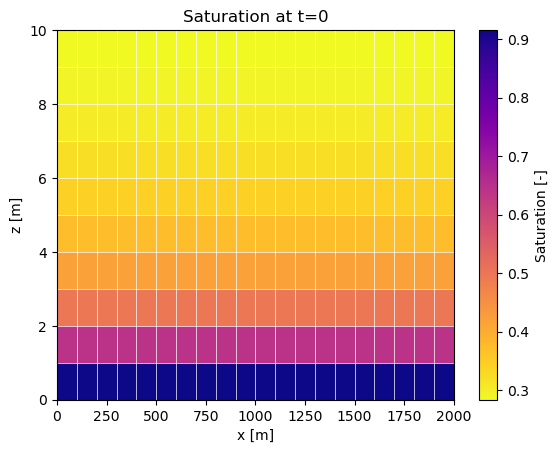

nx = 20, ny = 1, nz = 10, nt = 101
dx = 100.0, dy = 2.0, dz = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vmin: -9.5, vmax: -0.5


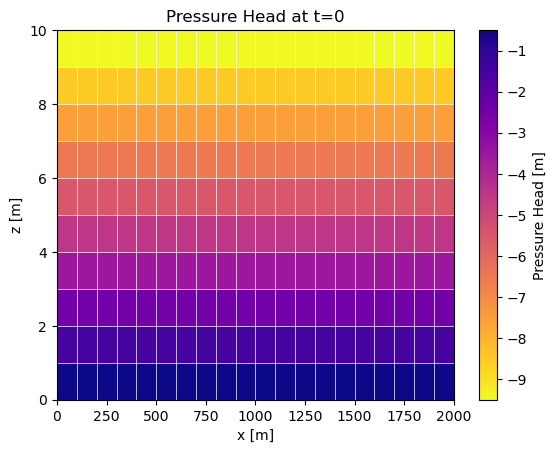

In [6]:
# Call plotting function for saturation and pressure
plot_domain(base, "satur", timestep=0)
plot_domain(base, "press", timestep=0)

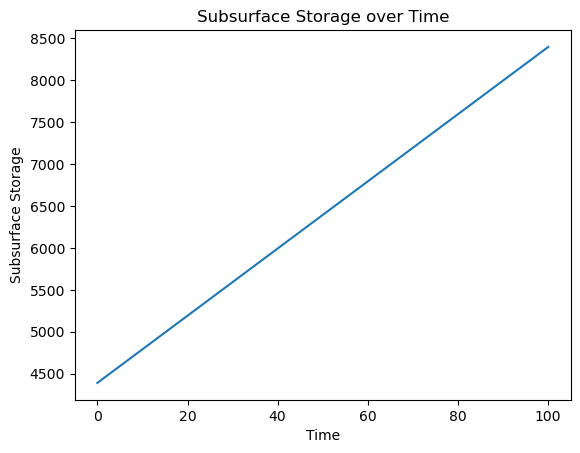

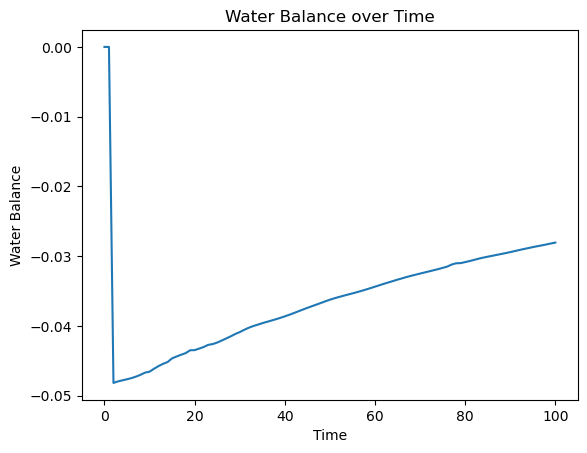

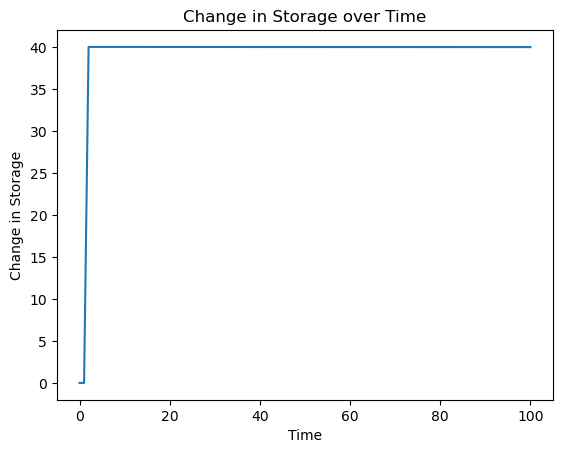

In [7]:
# Plot subsurface storage over time and water balance
plot_subsurface_storage(base)
plot_water_balance(base, run_name="domain_example")

## Topic 3: Initial Conditions

### Activities

You will explore how using a solid file to define the domain affects the conditions of a ParFlow run. The following notebook cells set up a ParFlow run by importing a ParFlow run definition, run ParFlow for 100 timesteps, and visualize the resulting ParFlow run grid. Please see [box_domain_setup_full.ipynb](https://github.com/hydroframe/parflow_short_course_updated/blob/main/initial_conditions/box_domain_setup_full.ipynb) if you would like to see the full set of keys used to define the domain for this ParFlow run. In this section we are focusing on the ParFlow keys related to [Initial Conditions: Phase Saturations](https://parflow.readthedocs.io/en/latest/keys.html#initial-conditions-phase-saturations), [Initial Conditions: Pressure](https://parflow.readthedocs.io/en/latest/keys.html#initial-conditions-pressure), and [Initial Conditions: Phase Concentrations](https://parflow.readthedocs.io/en/latest/keys.html#initial-conditions-phase-concentrations). We will explain these keys in more detail in the cells below. Also feel free to explore the [ParFlow manual](https://parflow.readthedocs.io/en/latest/keys.html#) for detail on all ParFlow keys.

We'd like for you to first run the notebook cells in this section as-is to see the default domain visualized. Then we will provide instructions on how to experiment with changing several of the ParFlow keys to see how the results change.

Please complete the following:
1. Change the initial conditions constant values (`Geom.domain.ICPressure.Value`) from -10 to -1.
2. Read in the initial conditions from the last pressure file from one of the cases with the two constant head boundary conditions. Please uncomment the relevant line in the below code cell to set initial conditions from a file.

In [8]:
# Import the ParFlow package
from parflow import Run
import os
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists

In [9]:
# Import run information from pfidb
domain_example = Run.from_definition("domain_example.pfidb")

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------
domain_example.ICPressure.Type                 = 'HydroStaticPatch'
domain_example.ICPressure.GeomNames            = 'domain'
domain_example.Geom.domain.ICPressure.Value    = -10.00
domain_example.Geom.domain.ICPressure.RefGeom  = 'domain'
domain_example.Geom.domain.ICPressure.RefPatch = 'z_upper'

# For Step 2: Uncomment these line to read in the last pressure file from your previous run
# cp("output/domain_example.out.press.00100.pfb", "output/ic_pressure.pfb")  # Saving a copy so the pressure file used does not get overwritten
# domain_example.Geom.domain.ICPressure.FileName = "ic_pressure.pfb"  # Set path to file to use for initial conditions

#-----------------------------------------------------------------------------
# Run ParFlow
#-----------------------------------------------------------------------------
base = os.path.join(os.getcwd(), "output")
mkdir(base)
print(f"base: {base}")
domain_example.run(working_directory=base)

base: /home/jovyan/parflow_short_course_updated/initial_conditions/output

# ==============================================================================
# ParFlow directory
#  - /opt/parflow/
# ParFlow version
#  - 3.12.0
# Working directory
#  - /home/jovyan/parflow_short_course_updated/initial_conditions/output
# ParFlow database
#  - domain_example.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



nx = 20, ny = 1, nz = 10, nt = 101
dx = 100.0, dy = 2.0, dz = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vmin: 0.28374782761443423, vmax: 0.9155417527999328


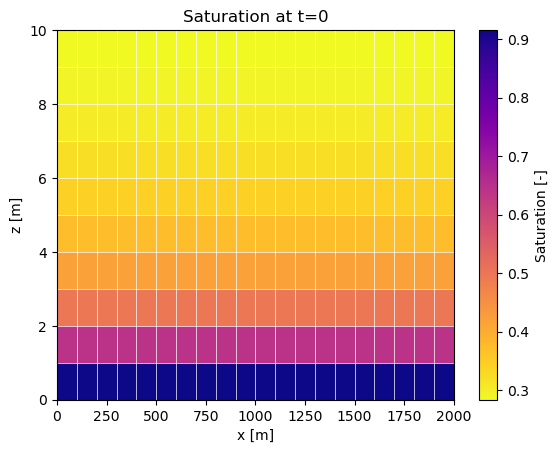

nx = 20, ny = 1, nz = 10, nt = 101
dx = 100.0, dy = 2.0, dz = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
vmin: -9.5, vmax: -0.5


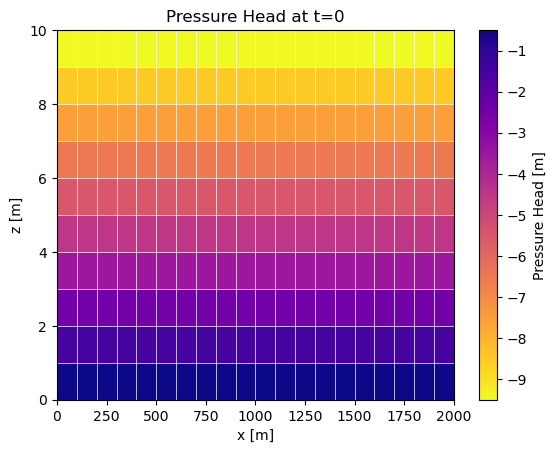

In [10]:
# Call plotting function for saturation and pressure
plot_domain(base, "satur", timestep=0)
plot_domain(base, "press", timestep=0)

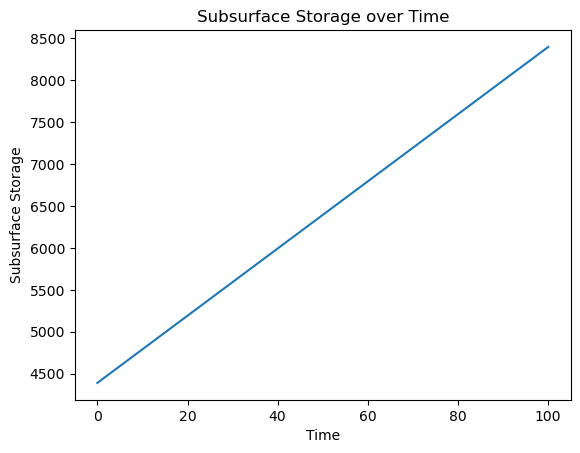

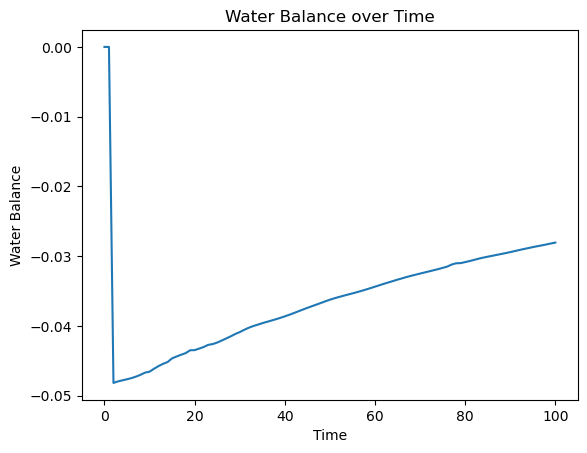

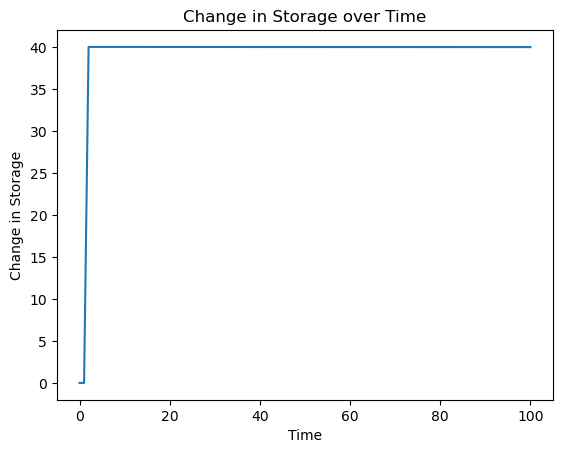

In [11]:
# Plot subsurface storage over time and water balance
plot_subsurface_storage(base)
plot_water_balance(base, run_name="domain_example")

## Module Activities
After using the above topics to explore boundary conditions and initial conditions, please develop your own code cells below to address the following:

1. Choose one set of boundary conditions and run it for multiple initial conditions. Do you get the same answer? 
1. For a given flux boundary condition at the top, adjust the rest of your boundary conditions to try to minimize outflow out of the domain. (What if you want to maximize)
1. BONUS question: Are the simulations you have run so far in steady state? Adjust your run to achieve steady state for one of your configurations. 